# Note sur adimensionnement des équations
Mathis Chevé, MOLONARI 2023

In [1]:
import numpy as np
from numpy import linalg as npln
import matplotlib
from matplotlib import pyplot as plt
from pyheatmy import *

plt.rcParams.update({'font.size': 20})
plt.style.use('Solarize_Light2')

taille_police = 20
fav_mark = ["^", "s", "o", "d"]
couleurs = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']

# Problème général

On cherche à solutionner le couple d'équations suivantes:

$$
\left\{\begin{array}{lll} 
S_s \partial_t h & = & \partial_z (K \partial_z H) \\
\rho_m c_m \partial_t T & = & \rho_w c_w q \partial_z T + \lambda_m \partial_z^2 T 
\end{array} \right.
\quad \text{avec} \quad  q = K \partial_z H \, \, ; \quad  K = \frac{k\rho_w g}{\mu_w} = \frac{k g}{\nu_w}
$$

## Adimensionnement et premières déductions

On procède ensuite à un adimensionnement de l'équation.
Cette étape est utile pour simplifier l'équation si certains termes sont dominants. Ce n'est pas le cas ici : les termes peuvent tous être importants, cela dépend du régime.
En outre, en adimensionnant correctement l'équation, tout les paramètres adimensionnés sont de l'ordre de l'unité. Cela limite donc les erreurs de calcul. Cela augmente aussi l'efficacité de calcul.

On fait donc les changements de variables suivants:

$$
\tilde{z}= \frac{z}{h} \quad \quad  \text{;} \quad \quad \tilde{t}= \frac{t}{P} \quad \quad  \text{;} \quad \quad \tilde{\theta} = \frac{\theta - T_{nap}}{T_{riv}-T_{nap}} =  \frac{\theta - T_{nap}}{\Delta T} \quad \quad \tilde{H} = \frac{H - H_{nap}}{H_{riv}-H_{nap}} =  \frac{H - H_{nap}}{\Delta H}
$$

Ici $h$ est la prfondeur de la colonne de sol étudiée, $P$ est la période caractéristique de variations de la température (24h dans notre cas).

On exprime l'équation avec les nouvelles variables pour obtenir l'équation adimensionnée (si $K$ est constant, voir le prochain notebook pour le cas non constant):


$$
\left\{\begin{array}{rll} 
\dfrac{S_s \Delta H }{P} \, \, \partial_{\tilde{t}} \tilde{H} & = & \dfrac{K \Delta H}{h^2}  \, \, \partial_{\tilde{z}}^2 \tilde{H} \\
\dfrac{\rho_m c_m \Delta T}{P}  \, \, \partial_{\tilde{t}} \tilde{\theta}  & = & \dfrac{\rho_w c_w K \Delta H \Delta T}{h^2}  \, \, \partial_{\tilde{z}} \tilde{H}  \, \, \partial_{\tilde{z}} \tilde{\theta} + \dfrac{\lambda_m \Delta T}{h^2}  \, \, \partial_{\tilde{z}}^2  \tilde{\theta} 
\end{array} \right.
\quad \text{avec} \quad  K = \frac{k\rho_w g}{\mu_w} = \frac{k g}{\nu_w}
$$


On regroupe ensuite les paramètres pour obtenir les composantes principales du système:


$$
\left\{\begin{array}{rll} 
\overbrace{\dfrac{S_s h^2}{P K }}^{\large{\gamma}}  \, \, \partial_{\tilde{t}} \tilde{H} & = & \partial_{\tilde{z}}^2 \tilde{H} \\
\underbrace{\dfrac{\rho_m c_m h^2}{P \lambda_m}}_{\large{\beta}}  \, \, \partial_{\tilde{t}} \tilde{\theta}  & = & \underbrace{\dfrac{\rho_w c_w K \Delta H}{\lambda_m}}_{\large{\alpha = Pe}}  \, \, \partial_{\tilde{z}} \tilde{H} \, \, \partial_{\tilde{z}} \tilde{\theta} + \partial_{\tilde{z}}^2  \tilde{\theta} 
\end{array} \right.
\quad \text{avec} \quad  K = \frac{k\rho_w g}{\mu_w} = \frac{k g}{\nu_w}
$$

L'étude des nombre adimensionné peut nous donner une idée de la manière dont réagit le système.
En effet, dans le cas présent on à $c \ll 1$ donc l'équation (1) est quasiment équivalente à $0 = \partial_{\tilde{z}}^2 \tilde{H}$. Le système réagit donc quasiment immédiatement aux variations temporelles de la charge dans la rivière. Cela peut se comprendre facilement car $ c =  \tau_h /P$ avec $\tau_h = S_s h^2 / K$ le temps caractéristique de réponse de la charge à une perturbation. Donc $c \ll 1$ équivant à $\tau_h \ll P$ donc à dire que le temps caractéristique d'ajustement de la charge est négligeable devant le temps caractéristique des variations de la charge.


On considère donc le système adimensionné suivant:


$$
\left\{\begin{array}{rll} 
\gamma \times \partial_{\tilde{t}} \tilde{H}      & = & \, & + & \partial_{\tilde{z}}^2 \tilde{H} \\
\beta  \times \, \, \partial_{\tilde{t}} \tilde{\theta} & = & \alpha \times \partial_{\tilde{z}} \tilde{H} \times \partial_{\tilde{z}} \tilde{\theta} & + & \partial_{\tilde{z}}^2 \tilde{\theta} 
\end{array} \right.
$$

avec les 3 paramètres (sans dimensions) :
$$
\alpha = \frac{\rho_w c_w k g \Delta H}{\mu_w \lambda_m} \quad ; \quad \beta = \frac{\rho_m c_m h^2}{\lambda_m P }  \quad ; \quad  \gamma = \frac{\mu_w h^2 S_s}{k \rho_w g P}
$$

IMPORTANT: Cette analyse montre que les profils de température et de charge dépendant uniquement de ces trois paramètres $\alpha$, $\beta$ et $\gamma$. Il est donc possible (sauf cas particulier) de déterminer ces trois paramètres si on nous donne un profil.

Le problème initial contient lui plus de paramètres: $n$, $k$, $S_s$, $\lambda_m$, $\rho$ et $c$. Il est impossible de remonter à tout ces paramètres. C'est facile à voir pour $\rho$ et $c$: en effet, dans les équations, seul le produit $\rho c$ appraît il est donc impossible de remonter indépendamment à $\rho$ et $c$.
Le fait que le profils ne dépende que du triplet ($\alpha$, $\beta$, $\gamma$) nous montre qu'il est impossible de remonter au 6-uplet ($n$, $k$, $S_s$, $\lambda_m$, $\rho$, $c$). En effet plusieurs 6-uplets sont équivalent acr ils donnent le même triplet ($\alpha$, $\beta$, $\gamma$). Il y a donc une infinité de solutions, exactes, au problème d'inversion.

## Schéma numérique


On considère le schéma numérique suivant. Il est implicite:

$$
\left\{\begin{array}{rlll} 
\gamma . (    H^{i+1} -    H^i ) / d\tau & = & & & (D_{2h} \times H^{i+1} - H_{2 \, CL} ) \\
\beta  . ( \, T^{i+1} - \, T^i ) / d\tau & = & \alpha . (D_h \times H^{i+1} - H_{1 \, CL}) . (D_T \times T^{i+1} \, \, -  T_{1 \, CL}) & + & (D_{2T} \times T^{i+1} - \, \, T_{2 \, CL} )
\end{array} \right.
$$

Avec, $H^{i} = (H^{i}_k) _{k \in [0,N-1]}$,  $T^{i} = (T^{i}_k) _{k \in [0,N-1]}$ ; $i$ est l'indice de temps, $k$ est l'indice d'espace. $D_h$, $D_{2h}$, $D_T$ et $D_{2T}$ sont des matrices de dérivation, elles sont définies dans le code ensuite. En réalisant les multiplications on obtient un système qui est le schéma numérique voulu, avec l'expression de $H^{i+1}_k$ exprimé en fonction des $H^{i+1}_p$ et $H^{i}_p$

On résout donc selon le schéma suivant:

- $ H^{i+1} = (1 - d\tau \, \gamma^{-1} . D_{2h} )^{-1} \times (H^{i} - d\tau \, \gamma ^{-1}\, H_{2 \, CL})$
- $ T^{i+1} = (1 - \beta^{-1} \, d\tau \, \alpha  . (D_h \times H^{i+1} - H_{1 \, CL}) . D_T - \beta^{-1} \, d\tau \, D_{2T} ))^{-1} \times (T^{i}  - \beta^{-1} \, d\tau \, \alpha  . (D_h \times H^{i+1} - H_{1 \, CL}) . T_{1 \, CL} - \beta^{-1} \, d\tau \, T_{2 \, CL}) $





In [2]:
### Définition des fonctions pour obtenir les matrices de dérivation et les conditions limites

def M_Dzz_h(N , H_nap_ad = 0, H_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation seconde de h, de taille N*N
        - Matrice de condition limites de la dérivée seconde de h, de taille N
    """
    M = np.zeros((N,N))
    M = np.eye(N,k=1) - 2*np.eye(N,k=0) + np.eye(N,k=-1)
    M[0,0] = -4
    M[0,1] = 4/3
    M[N-1,N-2] = 4/3
    M[N-1,N-1] = -4
    M = M*N**2
    
    CL = np.zeros(N)
    CL[0]   = - H_riv_ad * 8/3 * N**2      #Condition limite dans la rivière
    CL[N-1] = - H_nap_ad * 8/3 * N**2      #Condition limite dans l'aquifère

    return M, CL

def M_Dz_h(N , H_nap_ad = 0, H_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation première de h, de taille N*N
        - Matrice de condition limites de la dérivée première de h, de taille N
    """
    M = np.zeros((N,N))
    M = (np.eye(N,k=1) - np.eye(N,k=-1))/2
    M[0,1] = 2/3
    M[N-1,N-2] = -2/3
    M = M*N
    
    CL = np.zeros(N)
    CL[0]   = + H_riv_ad * 2/3 * N     #Condition limite dans la rivière
    CL[N-1] = - H_nap_ad * 2/3 * N     #Condition limite dans l'aquifère

    return M, CL


def M_Dz_T(N , T_nap_ad = 0, T_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation première de T, de taille N*N
        - Matrice de condition limites de la dérivée première de T, de taille N
    """
    M = np.zeros((N,N))
    M = (np.eye(N,k=1) - np.eye(N,k=-1))/2
    M[0,1] = 2/3
    M[N-1,N-2] = -2/3
    M = M*N
    
    CL = np.zeros(N)
    CL[0]   = + T_riv_ad * 2/3 * N     #Condition limite dans la rivière
    CL[N-1] = - T_nap_ad * 2/3 * N     #Condition limite dans l'aquifère

    return M, CL

def M_Dzz_T(N , T_nap_ad = 0, T_riv_ad = 1):
    """
    Paramètre :
        - N résoluation spatiale
    Résultat : 
        - Matrice de dérivation seconde de T, de taille N*N
        - Matrice de condition limites de la dérivée seconde de h, de taille N
    """
    M = np.zeros((N,N))
    M = np.eye(N,k=1) - 2*np.eye(N,k=0) + np.eye(N,k=-1)
    M[0,0] = -4
    M[0,1] = 4/3
    M[N-1,N-2] = 4/3
    M[N-1,N-1] = -4
    M = M*N**2
    
    CL = np.zeros(N)
    CL[0]   = - T_riv_ad * 8/3 * N**2      #Condition limite dans la rivière
    CL[N-1] = - T_nap_ad * 8/3 * N**2      #Condition limite dans l'aquifère

    return M, CL

In [3]:
### Définition des fonctions pour calculer les paramètres alpha, beta et gamma

### Cas   dépendant de la température

def C_nd_adim(T, z):
    """
    Paramètre :
        - T : Température adimensionnée 
    Résultat : 
        - Coefficients pour la résolution matricielle, dépendant de la température
    """
    T_dim = T*(T_riv - T_nap) + T_nap
    rho_m = rho_r*(1-n) + Rho_w(T_dim)*n
    c_m   = c_r  *(1-n) + C_w(T_dim)  *n
    
    alpha = Rho_w(T_dim) * C_w(T_dim) * k * g * Dh * 1./Mu(T_dim) / lambda_m
    beta  = rho_m * c_m * (h_adm**2) / (P*lambda_m)
    gamma = (h_adm**2 * Ss * Mu(T_dim) ) * 1./Rho_w(T_dim) / (k * g * P)
    
    return alpha, beta, gamma

### Cas indépendant de la température

def C_nd_adim_cst(T, z):
    """Paramètre :
        - T : Température adimensionnée 
    Résultat : 
        - Coefficients pour la résolution matricielle, indépendant de la température
    """

    T_dim = 283 + 0*T
    rho_m = rho_r*(1-n) + Rho_w(T_dim)*n
    c_m   = c_r  *(1-n) + C_w  (T_dim)*n
    
    alpha = Rho_w(T_dim) * C_w(T_dim) * k * g * Dh * 1./Mu(T_dim) / lambda_m
    beta  = rho_m        * c_m        * (h_adm**2)     / (P*lambda_m)
    gamma = (h_adm**2 * Ss * Mu(T_dim) ) * 1./Rho_w(T_dim) / (k * g * P)
    
    return alpha, beta, gamma



### Fonction des propriétés thermodynamiques

def Mu(T):
    """"
    Paramètres : T : Température ou Tableau de températures
    Résultat : mu : Viscosité à la température T supposée indépendante de T
    """
    mu = 1e-3 + T*0
    return mu

def Rho_w(T):
    """"
    Paramètres : T : Température ou Tableau de températures
    Résultat : rho_w : Masse volumique à la température T supposée indépendante de T
    """
    rho_w = 1e3 + T*0
    return rho_w

def C_w(T):
    """"
    Paramètres : T : Température ou Tableau de températures
    Résultat : rho_w : Masse volumique à la température T supposée indépendante de T
    """
    C_w =  4.21780753e3 + T*0
    return C_w


In [4]:
### Paramètres
## Physiques

T_riv = 273 + 25
T_nap = 273 +  5
h_riv = 25e-2
h_nap = 0
z_nap = 8

g         = 9.81
Dh        = h_riv - h_nap
lambda_m  = 1
rho_r     = 1e3
c_r       = 4e3
n         = 0.3
k         = 1e-10 ## entre -11 et -15
h_adm     = 8
P         = 60*60*24
s         = n
Ss        = s/z_nap

## Numériques

Nz        = 100
Nt        = 4*24*4
Ntconv    = 200
dtau_conv = 50
dtau      = 15*60 / P

print(C_nd_adim(1/2,1))

(1.0344172967325003, 3011.3646362962963, 0.028315777551251555)


In [5]:
def init(Nz, if_test = False):

    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    
    ### Matrices de dérivation
    Dz_h , CL_Dz_h  = M_Dz_h (Nz)
    Dzz_h, CL_Dzz_h = M_Dzz_h(Nz)
    Dz_T , CL_Dz_T  = M_Dz_T (Nz)
    Dzz_T, CL_Dzz_T = M_Dzz_T(Nz)

    ## Condition initiales
    h_init = np.matmul(npln.inv(Dzz_h),CL_Dzz_h)  # Profil linéaire pour h (solution stationnaire)

    alpha, beta, gamma = C_nd_adim_cst(0, Z)          # Calcul d'un profil initial avec des paramètres indépendants de la température
    A_init = np.zeros(Nz) + alpha
    B_init = np.zeros(Nz) + beta
    C_init = np.zeros(Nz) + gamma

    Dzh     = np.matmul(Dz_h, h_init) - CL_Dz_h
    Dzh_tab = np.matmul(np.ones((Nz,1)), np.reshape(Dzh,(1,Nz)))

    if if_test:
        M_T  = Dzz_T
        CL_T = CL_Dzz_T
    else:
        M_T  = alpha * Dzh_tab * Dz_T    + Dzz_T
        CL_T = alpha * Dzh     * CL_Dz_T + CL_Dzz_T

    T_init = np.matmul(npln.inv(M_T),CL_T)        # Solution stationnaire pour T, avec des coefficients indépendant de T
    
    return T_init, h_init, A_init, B_init, C_init

In [6]:
def iter_H(dt, N, gamma, H_prec, H_nap_ad = 0, H_riv_ad = 1):

    # Calcul de h^{kt}

    gamma_tab = np.matmul(np.reshape(gamma,(N,1)), np.ones((1,N)))
    Dzz_h, CL_Dzz_h = M_Dzz_h(N, H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)

    M_eq_H     = np.eye(N) - dt * 1./gamma_tab * Dzz_h
    M_eq_H_inv = npln.inv(M_eq_H)
    CL_eq_H    = dt * 1./gamma * CL_Dzz_h
    
    H_suiv = np.matmul(M_eq_H_inv, (H_prec - CL_eq_H) )

    return H_suiv

def iter_T(dt, N, alpha, beta, H_suiv, T_prec, T_riv_ad = 0, T_nap_ad = 1, H_nap_ad = 0, H_riv_ad = 1):

    # Calcul de T^{kt}

    alpha_tab = np.matmul(np.reshape(alpha,(N,1)), np.ones((1,N)))
    beta_tab  = np.matmul(np.reshape(beta ,(N,1)), np.ones((1,N)))

    Dz_h , CL_Dz_h  = M_Dz_h (N, H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)
    Dz_T , CL_Dz_T  = M_Dz_T (N, T_nap_ad = T_nap_ad, T_riv_ad = T_riv_ad)
    Dzz_T, CL_Dzz_T = M_Dzz_T(N, T_nap_ad = T_nap_ad, T_riv_ad = T_riv_ad)

    Dzh       = np.matmul(Dz_h, H_suiv) - CL_Dz_h
    Dzh_tab   = np.matmul(np.reshape(Dzh  ,(N,1)), np.ones((1,N)))

    M_eq_T     = np.eye(N) - dt * alpha_tab * 1./beta_tab * Dzh_tab * Dz_T - dt * 1./beta_tab * Dzz_T
    M_eq_T_inv = npln.inv(M_eq_T)
    CL_eq_T    = dt * alpha * 1./beta * Dzh * CL_Dz_T + dt * 1./beta * CL_Dzz_T

    T_suiv = np.matmul(M_eq_T_inv, (T_prec - CL_eq_T) )

    return T_suiv

def iter_H_T(dt, N, H, T, A, B, C, kt, T_riv_ad = 0, T_nap_ad = 1, H_nap_ad = 0, H_riv_ad = 1, if_cst = False):

    Z = np.linspace(1/(2*N),1-1/(2*N),N)

    # Calcul des paramètres adimensionnés
    if if_cst:
        alpha, beta, gamma = C_nd_adim_cst(T[kt-1], Z)
    else:
        alpha, beta, gamma = C_nd_adim    (T[kt-1], Z)

    # Calcul du H suivant
    H[kt] = iter_H(dt, N, gamma,       H[kt-1],          H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)

    # Calcul de T suivant
    T[kt] = iter_T(dt, N, alpha, beta, H[kt]  , T[kt-1], T_riv_ad = T_riv_ad, T_nap_ad = T_nap_ad, H_nap_ad = H_nap_ad, H_riv_ad = H_riv_ad)
    A[kt,:] = alpha
    B[kt,:] = beta
    C[kt,:] = gamma
    
    return None

def boucle_temps(dt, N_prf, N_tps, T_init, H_init, A_init, B_init, C_init, T_nap_ad = 0, T_riv_ad = 1, H_nap_ad = 0, H_riv_ad = 1, if_cst = False):
    if np.shape(T_nap_ad) == ():
        T_nap_ad_temp = np.zeros(N_tps) + T_nap_ad
    else:
        T_nap_ad_temp = T_nap_ad

    if np.shape(T_riv_ad) == ():
        T_riv_ad_temp = np.zeros(N_tps) + T_riv_ad
    else:
        T_riv_ad_temp = T_riv_ad

    if np.shape(H_nap_ad) == ():
        H_nap_ad_temp = np.zeros(N_tps) + H_nap_ad
    else:
        H_nap_ad_temp = H_nap_ad

    if np.shape(H_riv_ad) == ():
        H_riv_ad_temp = np.zeros(N_tps) + H_riv_ad
    else:
        H_riv_ad_temp = H_riv_ad

    T = np.zeros((N_tps,N_prf)) # Temperature en fonction du temps et de l'espace
    H = np.zeros((N_tps,N_prf)) # Charge      en fonction du temps et de l'espace
    A = np.zeros((N_tps,N_prf))
    B = np.zeros((N_tps,N_prf))
    C = np.zeros((N_tps,N_prf))

    T[0,:] = T_init
    H[0,:] = H_init
    A[0,:] = A_init
    B[0,:] = B_init
    C[0,:] = C_init

    for kt in range(1, N_tps):
        iter_H_T(dt, N_prf, H, T, A, B, C, kt, T_nap_ad = T_nap_ad_temp[kt], T_riv_ad = T_riv_ad_temp[kt], H_nap_ad = H_nap_ad_temp[kt], H_riv_ad = H_riv_ad_temp[kt], if_cst = if_cst)
    
    return T, H, A, B, C

In [7]:
def compute_termes_eq(dt, t, T, H, A, B, C, T_nap_ad = 0, T_riv_ad = 1, H_nap_ad = 0, H_riv_ad = 1):
    
    (Nt, Nz) = np.shape(H)
    kt = int(t/dt)

    if kt > Nt:
        return "Error : t out of time limit"
    elif t < dt:
        return "Error : t < dt"
    else:
        if np.shape(T_nap_ad) == ():
            T_nap_ad_t = T_nap_ad
        else:
            T_nap_ad_t = T_nap_ad[kt]

        if np.shape(T_riv_ad) == ():
            T_riv_ad_t = T_riv_ad
        else:
            T_riv_ad_t = T_riv_ad[kt]

        if np.shape(H_nap_ad) == ():
            H_nap_ad_t = H_nap_ad
        else:
            H_nap_ad_t = H_nap_ad[kt]

        if np.shape(H_riv_ad) == ():
            H_riv_ad_t = H_riv_ad
        else:
            H_riv_ad_t = H_riv_ad[kt]
    
        Dz_h , CL_Dz_h  = M_Dz_h (Nz, H_nap_ad = H_nap_ad_t, H_riv_ad = H_riv_ad_t)
        Dzz_h, CL_Dzz_h = M_Dzz_h(Nz, H_nap_ad = H_nap_ad_t, H_riv_ad = H_riv_ad_t)
        Dz_T , CL_Dz_T  = M_Dz_T (Nz, T_nap_ad = T_nap_ad_t, T_riv_ad = T_riv_ad_t)
        Dzz_T, CL_Dzz_T = M_Dzz_T(Nz, T_nap_ad = T_nap_ad_t, T_riv_ad = T_riv_ad_t)

        Times_side = B[kt,:] * (T[kt,:] -  T[kt-1,:])/dt
        Darcy_side = A[kt,:] * (np.matmul(Dz_h, H[kt,:]) - CL_Dz_h) * (np.matmul(Dz_T , T[kt,:]) - CL_Dz_T )
        Diffu_side =                                                  (np.matmul(Dzz_T, T[kt,:]) - CL_Dzz_T)
        Times_side_H = C[kt,:] * (H[kt,:] - H[kt-1,:])/dt
        Diffu_side_H = (np.matmul(Dzz_h, H[kt,:]) - CL_Dzz_h)

    return Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H

In [8]:
def afficher_CI(T_init, h_init, taille_police = 20):

    Nz = len(T_init)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée

    ### Matrices de dérivation
    Dz_h , CL_Dz_h  = M_Dz_h (Nz)
    Dzz_h, CL_Dzz_h = M_Dzz_h(Nz)
    Dz_T , CL_Dz_T  = M_Dz_T (Nz)
    Dzz_T, CL_Dzz_T = M_Dzz_T(Nz)

    plt.figure(figsize =(14,7))
    plt.subplot(1,2,2)
    # plt.plot(h_init_aff, Z_aff)
    plt.plot(h_init, Z)
    plt.xlabel(r"$\tilde{h}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$", fontsize = taille_police)
    plt.subplot(1,2,1)
    # plt.plot(T_init_aff, Z_aff)
    plt.plot(T_init, Z)
    plt.xlabel(r"$\tilde{T}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$", fontsize = taille_police)
    plt.show()

    plt.figure(figsize =(14,7))
    plt.subplot(1,2,2)
    plt.plot(np.matmul(Dz_h, h_init) - CL_Dz_h, Z)
    plt.xlabel(r"$\partial_{\tilde{z}} \tilde{h}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                     , fontsize = taille_police)
    plt.subplot(1,2,1)
    plt.plot(np.matmul(Dz_T, T_init) - CL_Dz_T, Z)
    plt.xlabel(r"$\partial_{\tilde{z}} \tilde{T}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                     , fontsize = taille_police)
    plt.show()

    plt.figure(figsize =(14,7))
    plt.subplot(1,2,2)
    plt.plot(np.matmul(Dzz_h, h_init) - CL_Dzz_h, Z)
    plt.xlabel(r"$\partial_{\tilde{z}}^2 \tilde{h}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                       , fontsize = taille_police)
    plt.subplot(1,2,1)
    plt.plot(np.matmul(Dzz_T, T_init) - CL_Dzz_T, Z)
    plt.xlabel(r"$\partial_{\tilde{z}}^2 \tilde{T}$", fontsize = taille_police)
    plt.ylabel(r"$\tilde{z}$"                       , fontsize = taille_police)
    plt.show()


def afficher_H_T(dt, T, H, N_c = 10, taille_police = 20, N_dec = 2):

    (Nt, Nz) = np.shape(H)
    N_aff = int(Nt/N_c)

    Kt_aff = np.arange(0, Nt, N_aff)        # Indices de temps affichés
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    temps = np.arange(Nt)*dt
    ## Parapluies

    plt.figure(figsize = (14,7), num = 11)
    for kt in Kt_aff:
        plt.subplot(1,2,1)
        plt.plot(T[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
        plt.subplot(1,2,2)
        plt.plot(H[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
    plt.subplot(1,2,1)
    plt.legend()
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{T}$" , fontsize = taille_police)
    plt.subplot(1,2,2)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{h}$" , fontsize = taille_police)
    plt.legend()
    plt.show()

    return None

def afficher_ABC(dt, A, B, C, N_c = 10, taille_police = 20, N_dec = 2):

    (Nt, Nz) = np.shape(A)
    N_aff = int(Nt/N_c)

    Kt_aff = np.arange(0, Nt, N_aff)        # Indices de temps affichés
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    temps = np.arange(Nt)*dt

    plt.figure(figsize = (21,7), num = 12)
    for kt in Kt_aff:
        plt.subplot(1,3,1)
        plt.plot(A[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
        plt.subplot(1,3,2)
        plt.plot(B[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
        plt.subplot(1,3,3)
        plt.plot(C[kt,:], Z, label = r"$\tilde{t} = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "$")
    plt.subplot(1,3,1)
    plt.legend()
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$A$"         , fontsize = taille_police)
    plt.subplot(1,3,2)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$B$"         , fontsize = taille_police)
    plt.legend()
    plt.subplot(1,3,3)
    plt.ylabel(r"$\tilde{z}$" , fontsize = taille_police)
    plt.xlabel(r"$C$"         , fontsize = taille_police)
    plt.legend()
    plt.show()
        
    return None

def afficher_difference(dt, T1, T2, H1, H2, label1 = "1", label2 = "2", nfig = 12, if_percent = True):

    (Nt, Nz) = np.shape(T1)
    temps = np.arange(Nt)*dt

    dT_max = np.max (np.abs(T1 - T2), axis = 1)
    dT_mean= np.mean(np.abs(T1 - T2), axis = 1)
    dH_max = np.max (np.abs(H1 - H2), axis = 1)
    dH_mean= np.mean(np.abs(H1 - H2), axis = 1)
    if if_percent:
        dT_max = dT_max *100
        dT_mean= dT_mean*100
        dH_max = dH_max *100
        dH_mean= dH_mean*100

    plt.figure(figsize = (14,7), num = nfig)

    plt.subplot(1,2,1)
    plt.plot(temps, dT_mean, label = r"$\langle |T_{ " + label1 + "}- T_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dT_max , label = r"$\max(   |T_{ " + label1 + "}- T_{" + label2 + r"}|)$")
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()
    if if_percent:
        plt.ylabel(r"$dT \quad \%$", fontsize = taille_police)
    else:
        plt.yscale('log')
        plt.ylabel(r"$dT$"         , fontsize = taille_police)

    plt.subplot(1,2,2)
    plt.plot(temps, dH_mean, label = r"$\langle |H_{ " + label1 + "}- H_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dH_max , label = r"$\max(   |H_{ " + label1 + "}- H_{" + label2 + r"}|)$")
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()
    if if_percent:
        plt.ylabel(r"$dH \quad \%$", fontsize = taille_police)
    else:
        plt.yscale('log')
        plt.ylabel(r"$dH$"         , fontsize = taille_police)
    plt.show()

    return None

def afficher_convergence(dt, T, H, A, B, C, nfig = 13):

    (Nt, Nz) = np.shape(T)
    temps = np.arange(Nt-1)*dt

    ### Calcul de la vitesse de convergence

    dA = np.mean(np.abs(np.diff(A, axis = 0)), axis = 1)
    dB = np.mean(np.abs(np.diff(B, axis = 0)), axis = 1)
    dC = np.mean(np.abs(np.diff(C, axis = 0)), axis = 1)
    dH = np.mean(np.abs(np.diff(H, axis = 0)), axis = 1)
    dT = np.mean(np.abs(np.diff(T, axis = 0)), axis = 1)

    plt.figure(figsize = (7,7), num = nfig)
    plt.plot(temps, dA/dt, label = r"$A$")
    plt.plot(temps, dB/dt, label = r"$B$")
    plt.plot(temps, dC/dt, label = r"$C$")
    plt.plot(temps, dT/dt, label = r"$T$")
    plt.plot(temps, dH/dt, label = r"$H$")
    plt.ylabel(r"$\langle |\, d[\, \, ] \, / \, dt \, | \rangle $" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{t}$"                                      , fontsize = taille_police)
    plt.yscale('log')
    plt.legend()
    plt.show()

    return None

def afficher_evolution_temp(dt, z, T, H, nfig = 9, N_dec = 2, if_add_curve = False, linestyle = "-"):

    (Nt, Nz) = np.shape(T)
    temps = np.arange(Nt)*dt

    kz = int(z*Nz)

    T_z = T[:,kz]
    H_z = H[:,kz]

    plt.figure(figsize = (14,7), num = nfig)
    plt.subplot(1,2,1)
    plt.plot(temps, T_z, linestyle = linestyle, label = r"$T(z =" + str(int(z*10**N_dec)/10**N_dec) + ")$")
    plt.ylabel(r"$\tilde{T}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(temps, H_z, linestyle = linestyle, label = r"$H(z =" + str(int(z*10**N_dec)/10**N_dec) + ")$")
    plt.ylabel(r"$\tilde{H}$" , fontsize = taille_police)
    plt.xlabel(r"$\tilde{t}$" , fontsize = taille_police)
    plt.legend()
    
    if if_add_curve:
        pass
    else:
        plt.show()
    return None

def affichage_termes_eq(t, Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H, N_dec = 1):

    Nz = len(Times_side)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée

    plt.figure(figsize = (14,7))
    plt.subplot(1,2,1)
    plt.title(r"T equilibruim at $ t = " + str(int(t*10**N_dec)/10**N_dec) + r"$")

    plt.plot(Times_side, Z, marker = fav_mark[0], markevery = (0,10),  label = "Times")
    plt.plot(Darcy_side, Z, marker = fav_mark[1], markevery = (2,10),  label = "Darcy")
    plt.plot(Diffu_side, Z, marker = fav_mark[2], markevery = (4,10),  label = "Diffu")
    plt.plot(Times_side - Darcy_side - Diffu_side, Z, marker = fav_mark[3], markevery = (6,10),  label = "sum")
    plt.legend()

    plt.subplot(1,2,2)
    plt.title(r"H equilibruim at $ t = " + str(int(t*10**N_dec)/10**N_dec) + r"$")

    plt.plot(Times_side_H, Z, marker = fav_mark[0], markevery = (6,10),  label = "Times")
    plt.plot(0,0)
    plt.plot(Diffu_side_H, Z, marker = fav_mark[2], markevery = (3,10),  label = "Diffu")
    plt.plot(Times_side_H - Diffu_side_H, Z, marker = fav_mark[3], markevery = (0,10),  label = "sum")
    plt.plot()
    plt.legend()

    return None

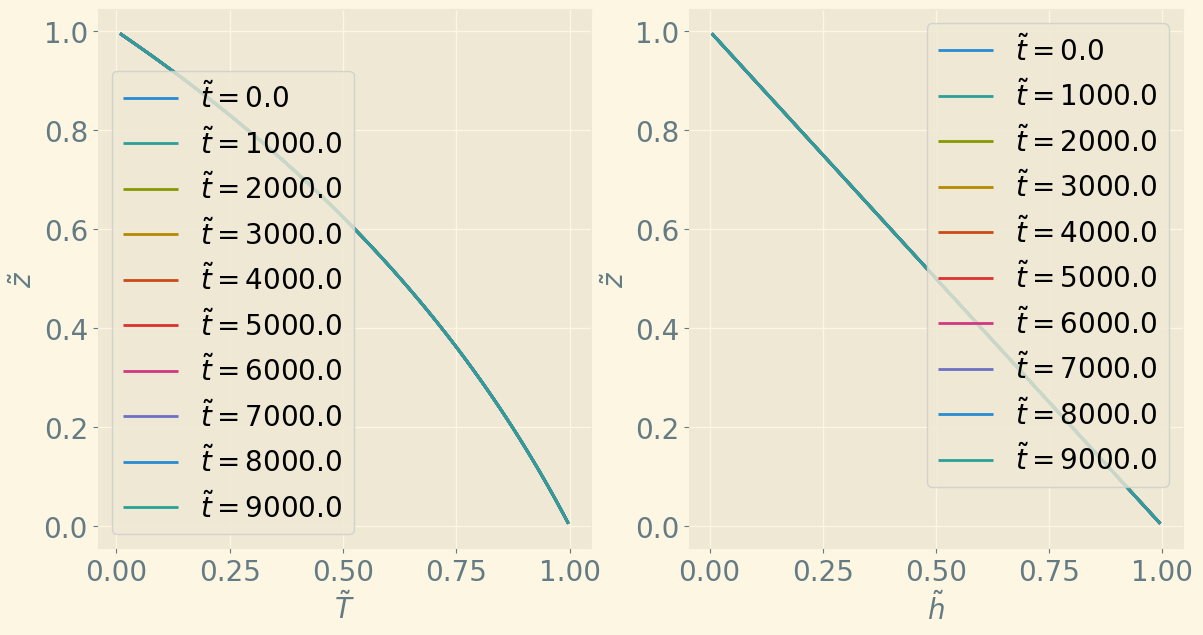

In [9]:
### Solution stationnaire dépendante de la température

T_init, H_init, A_init, B_init, C_init = init(Nz, if_test = False)
T     , H     , A     , B     , C      = boucle_temps(dtau_conv, Nz, Ntconv, T_init, H_init, A_init, B_init, C_init)

afficher_H_T(dtau_conv, T, H)


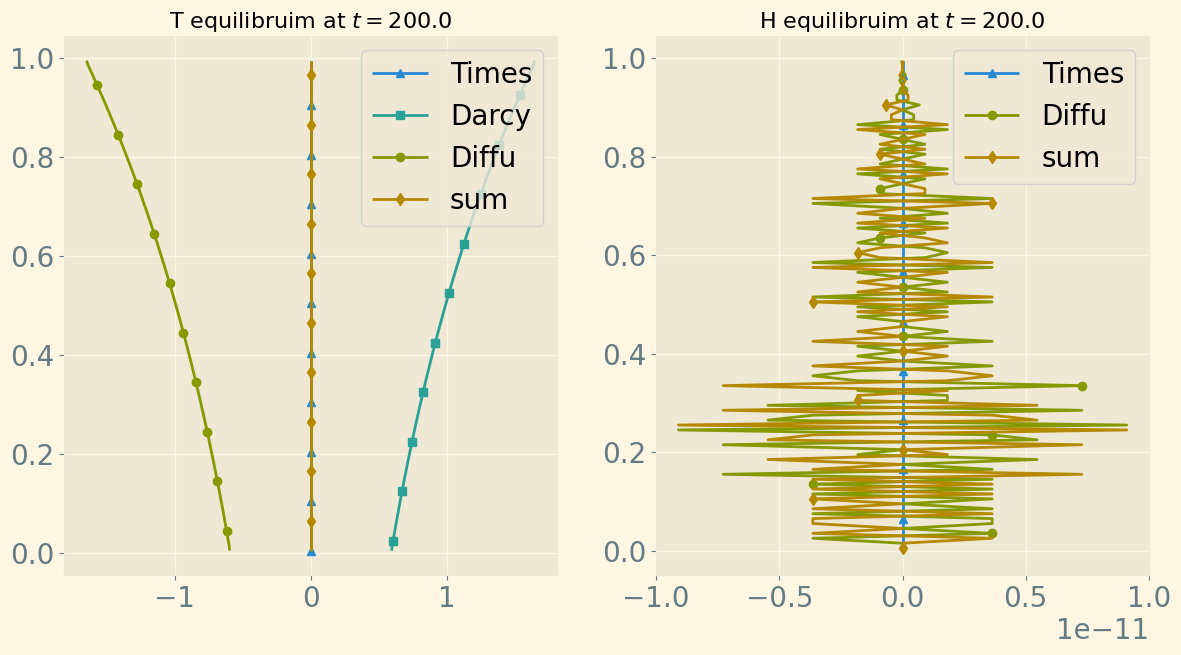

In [10]:
### Affichage de l'équilibrage des termes
t_aff = 200
Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H = compute_termes_eq(dtau_conv, t_aff, T, H, A, B, C)
affichage_termes_eq(t_aff, Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H)

# Différence des deux solutions avec une condition aux limite sinusoïdale pour la température

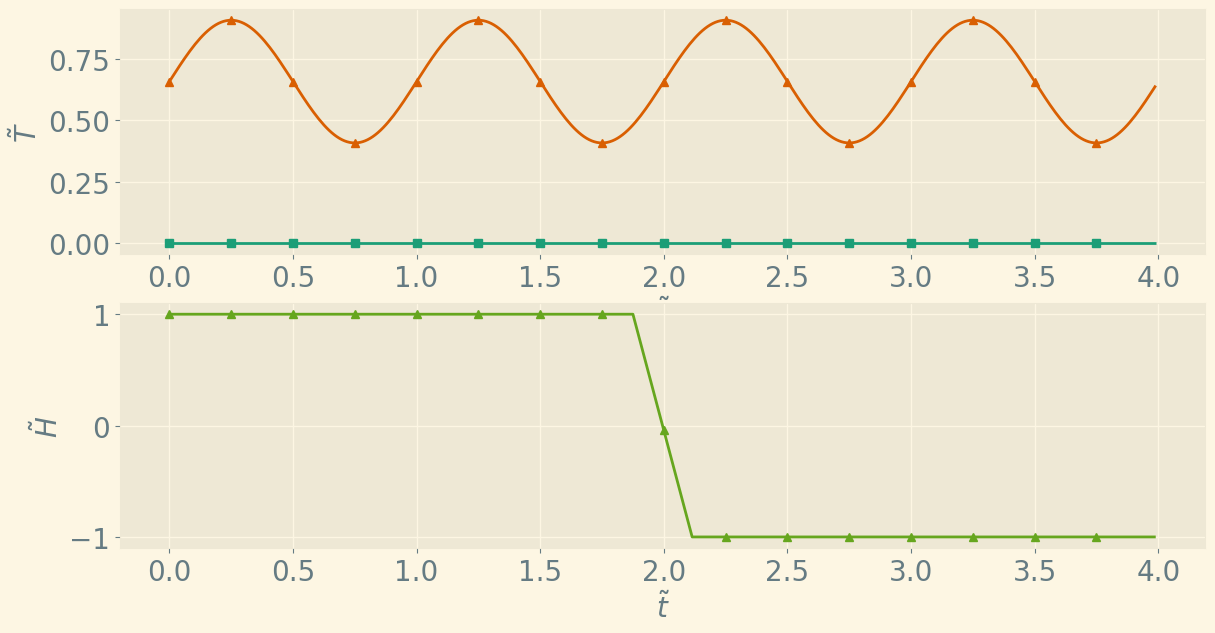

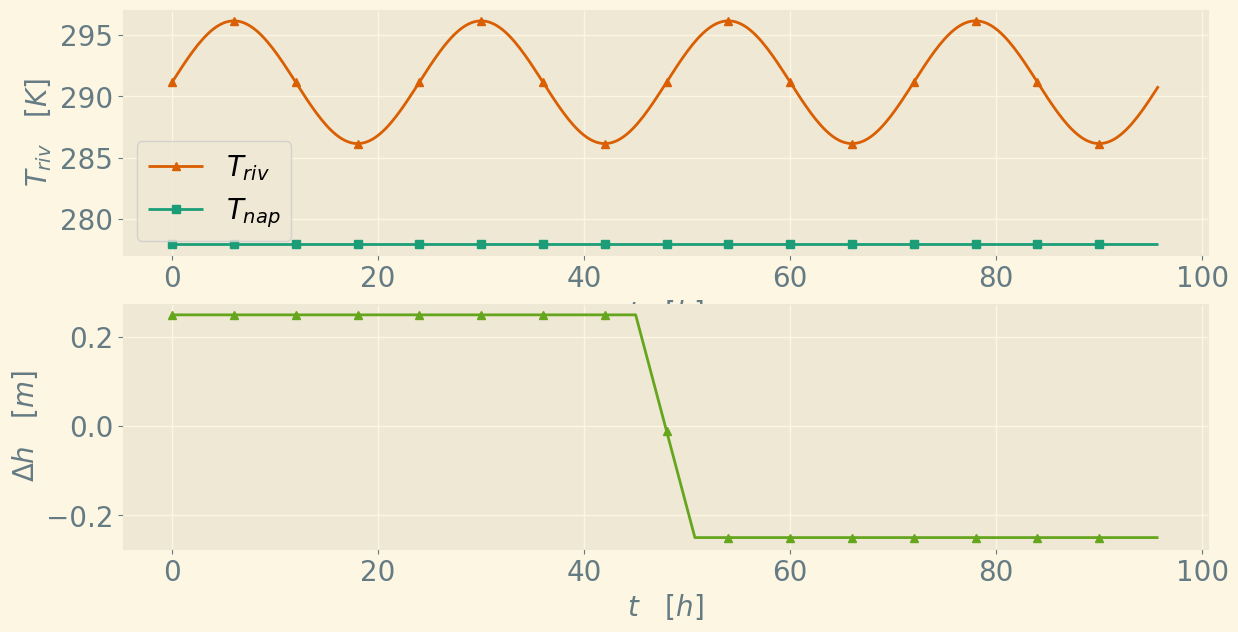

In [11]:
### Conditions aux limites dépendantes du temps

H_riv_max =  25e-2
H_riv_min = -25e-2

Temps = np.arange(Nt)*dtau
Temps_dim = Temps*P
T_riv_dim_t = ZERO_CELSIUS + 18 + 5*np.sin(2*np.pi*Temps) # + 6*np.sin(2*np.pi*Temps/365)
H_riv_dim_t = np.zeros(Nt)
H_riv_dim_t[0            : 2*24*4 - 3*4] = H_riv_max
H_riv_dim_t[2*24*4 - 3*4 : 2*24*4 + 3*4] = np.linspace(H_riv_max, H_riv_min, 6*4)
H_riv_dim_t[2*24*4 + 3*4 :       4*24*4] = H_riv_min

T_riv_ad_t = (T_riv_dim_t - T_nap)/(T_riv - T_nap)
H_riv_ad_t = (H_riv_dim_t - h_nap)/(h_riv - h_nap)


plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.plot(Temps, T_riv_ad_t  , color = couleurs[1], marker = fav_mark[0], markevery = 24, label = r"$T_{riv}$")
plt.plot(Temps, T_riv_ad_t*0, color = couleurs[0], marker = fav_mark[1], markevery = 24, label = r"$T_{nap}$")
plt.xlabel(r"$ \tilde{t} $", fontsize = 20)
plt.ylabel(r"$ \tilde{T} $", fontsize = 20)

plt.subplot(2,1,2)
plt.plot(Temps, H_riv_ad_t, color = couleurs[4], marker = fav_mark[0], markevery = 24)
plt.xlabel(r"$ \tilde{t} $", fontsize = 20)
plt.ylabel(r"$ \tilde{H} $", fontsize = 20)
plt.show()

plt.figure(figsize = (14,7))
plt.subplot(2,1,1)
plt.plot(Temps_dim/3600,   T_riv_dim_t        , color = couleurs[1], marker = fav_mark[0], markevery = 24, label = r"$T_{riv}$")
plt.plot(Temps_dim/3600, 0*T_riv_dim_t + T_nap, color = couleurs[0], marker = fav_mark[1], markevery = 24, label = r"$T_{nap}$")
plt.legend()
plt.xlabel(r"$ t \quad [h] $"      , fontsize = 20)
plt.ylabel(r"$ T_{riv} \quad [K] $", fontsize = 20)

plt.subplot(2,1,2)
plt.plot(Temps_dim/3600, H_riv_dim_t, color = couleurs[4], marker = fav_mark[0], markevery = 24)
plt.xlabel(r"$ t \quad [h] $"       , fontsize = 20)
plt.ylabel(r"$ \Delta h \quad [m] $", fontsize = 20)

# plt.savefig("cas_test.png", format = "png")
plt.show()

In [12]:
### Solution avec conditions aux limites dépendantes du temps
### Définition des conditions initiales
T_init_cor = T[Ntconv - 1]
H_init_cor = H[Ntconv - 1]
A_init_cor = A[Ntconv - 1]
B_init_cor = B[Ntconv - 1]
C_init_cor = C[Ntconv - 1]

T_cor_temp , H_cor_temp , A_cor_temp , B_cor_temp , C_cor_temp  = boucle_temps(dtau, Nz, Nt, T_init_cor , H_init_cor , A_init_cor , B_init_cor , C_init_cor , T_riv_ad= T_riv_ad_t, H_riv_ad= H_riv_ad_t)


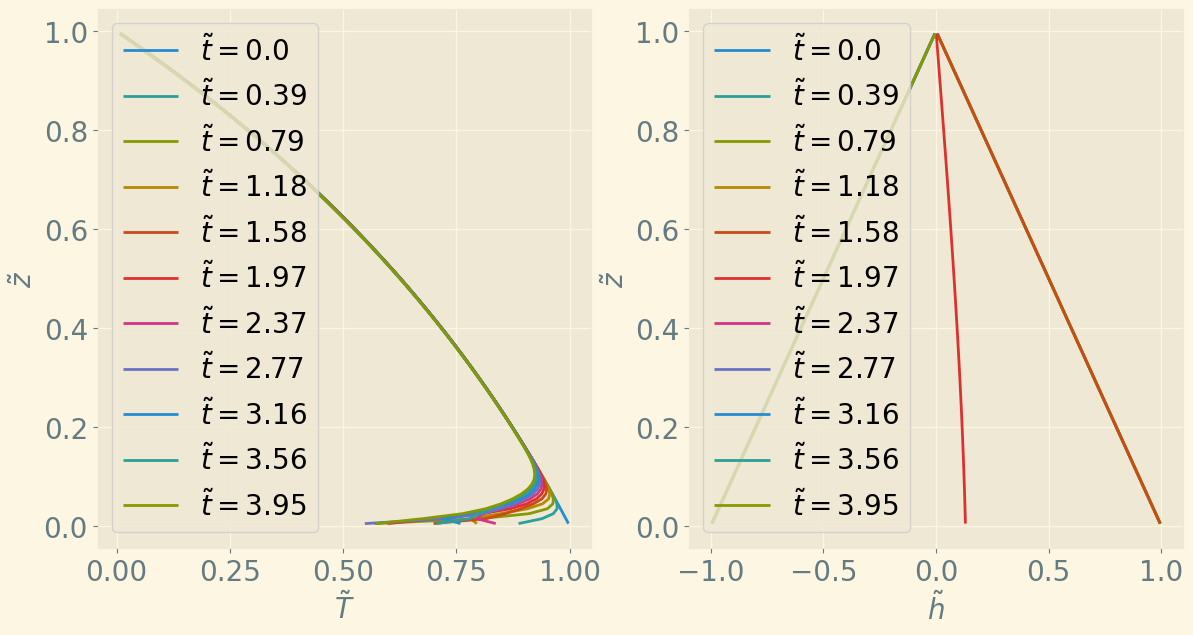

In [13]:
afficher_H_T(dtau, T_cor_temp , H_cor_temp )


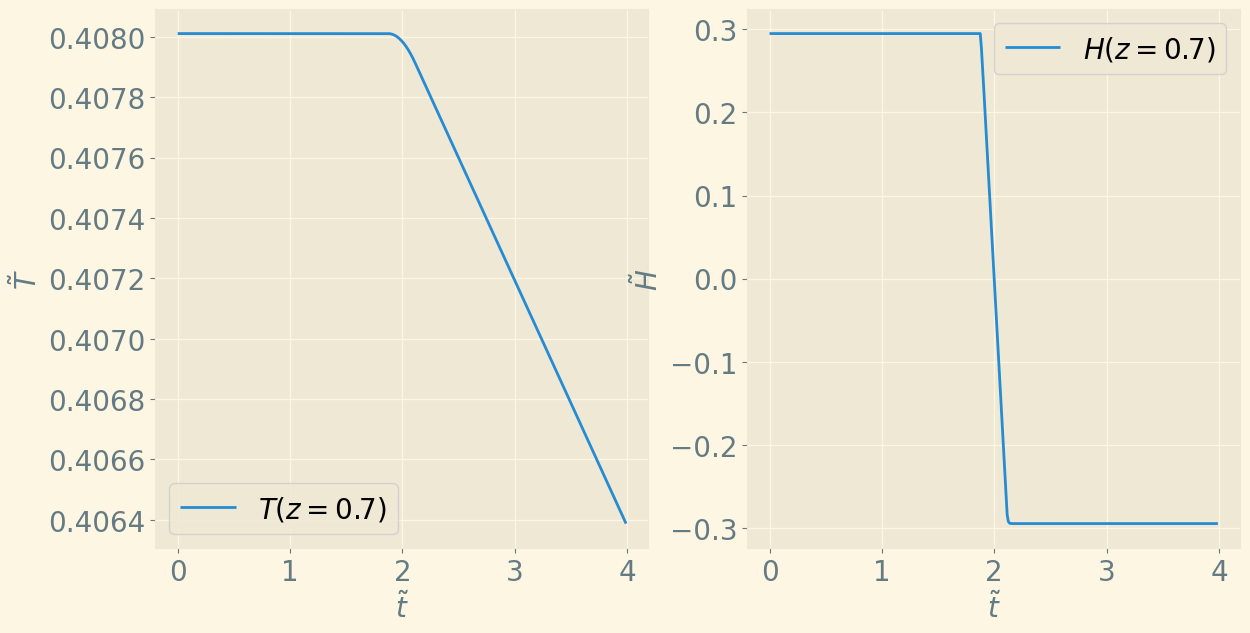

In [14]:
### Affichage pour un z donné
z_aff_1 = 0.7
afficher_evolution_temp(dtau, z_aff_1, T_cor_temp , H_cor_temp , if_add_curve=True)

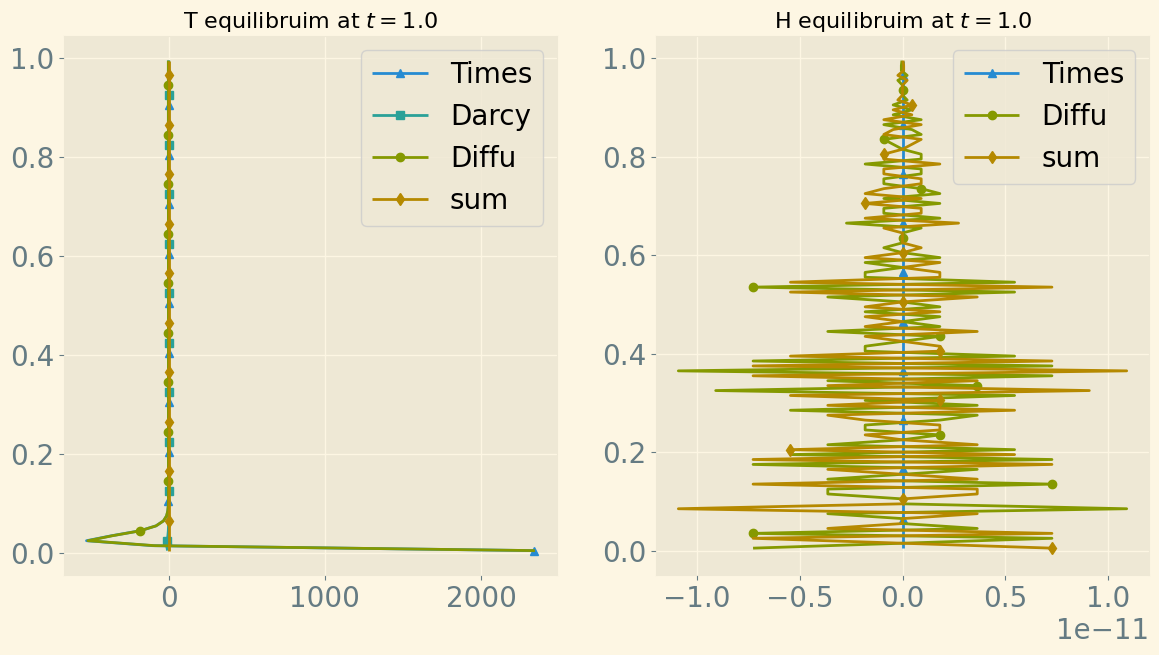

In [15]:
### affichage de l'équilibrage des termes
t_aff = 1
Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H = compute_termes_eq(dtau, t_aff, T_cor_temp , H_cor_temp , A_cor_temp , B_cor_temp , C_cor_temp  , T_riv_ad= T_riv_ad_t)
affichage_termes_eq(t_aff, Times_side, Darcy_side, Diffu_side, Times_side_H, Diffu_side_H)

# Redimensionnement

In [16]:
def redimensionnement(dt, T, H, h_dim, h_nap, h_riv, T_riv, T_nap, P, T_nap_ad = 0, T_riv_ad = 1, H_nap_ad = 0, H_riv_ad = 1):
    
    (Nt, Nz) = np.shape(H)
    Z = np.linspace(1/(2*Nz),1-1/(2*Nz),Nz) # Profondeur adimensionnée
    temps = np.arange(Nt)*dt*(P/(60**2))

    if np.shape(T_nap_ad) == ():
        T_nap_ad_temp = np.zeros(Nt) + T_nap_ad
    else:
        T_nap_ad_temp = T_nap_ad

    if np.shape(T_riv_ad) == ():
        T_riv_ad_temp = np.zeros(Nt) + T_riv_ad
    else:
        T_riv_ad_temp = T_riv_ad

    if np.shape(H_nap_ad) == ():
        H_nap_ad_temp = np.zeros(Nt) + H_nap_ad
    else:
        H_nap_ad_temp = H_nap_ad

    if np.shape(H_riv_ad) == ():
        H_riv_ad_temp = np.zeros(Nt) + H_riv_ad
    else:
        H_riv_ad_temp = H_riv_ad

    ### Affichage conditions initiales

    Z_aff = np.zeros(Nz+2)
    Z_aff[1:Nz+1] = Z
    Z_aff[0]      = 0
    Z_aff[Nz+1]   = 1
    Z_aff = - Z_aff * h_dim

    H_aff = np.zeros((Nt, Nz+2))
    H_aff[:, 1:Nz+1] = H
    H_aff[:, 0]      = H_riv_ad_temp
    H_aff[:, Nz+1]   = H_nap_ad_temp
    H_aff = H_aff * (h_riv - h_nap) + h_nap

    T_aff = np.zeros((Nt, Nz+2))
    T_aff[:, 1:Nz+1] = T
    T_aff[:, 0]      = T_riv_ad_temp
    T_aff[:, Nz+1]   = T_nap_ad_temp
    T_aff = T_aff * (T_riv - T_nap) + T_nap

    return temps, Z_aff, H_aff, T_aff

def afficher_H_T_dim(temps, Z_aff, H_aff, T_aff, N_c = 10, taille_police = 20, N_dec = 2, times = []):

    dt = temps[1] - temps[0]
    (Nt, Nz) = np.shape(H)
    if len(times) == 0:
        N_aff = int(Nt/N_c)
        Kt_aff = np.arange(0, Nt, N_aff) # Indices de temps affichés
    else:
        Kt_aff = np.around(times/dt)      # Indices de temps affichés

    ## Parapluies

    plt.figure(figsize = (14,7), num = 111)
    for kt in Kt_aff:
        kt = int(kt)
        plt.subplot(1,2,1)
        plt.plot(T_aff[kt,:], Z_aff, label = r"$t = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "\quad [h]$")
        plt.subplot(1,2,2)
        plt.plot(H_aff[kt,:], Z_aff, label = r"$t = " + str(int(temps[kt]*10**N_dec)/10**N_dec) + "\quad [h]$")
    plt.subplot(1,2,1)
    plt.legend()
    plt.ylabel(r"$z$" , fontsize = taille_police)
    plt.xlabel(r"$T$" , fontsize = taille_police)
    plt.subplot(1,2,2)
    plt.ylabel(r"$z$" , fontsize = taille_police)
    plt.xlabel(r"$h$" , fontsize = taille_police)
    plt.legend()
    plt.show()

    return None


def afficher_difference_dim(temps, T1, T2, H1, H2, taille_police = 20, label1 = "1", label2 = "2", nfig = 112):

    dT_max = np.max (np.abs(T1 - T2), axis = 1)
    dT_mean= np.mean(np.abs(T1 - T2), axis = 1)
    dH_max = np.max (np.abs(H1 - H2), axis = 1)
    dH_mean= np.mean(np.abs(H1 - H2), axis = 1)

    plt.figure(figsize = (14,7), num = nfig)

    plt.subplot(1,2,1)
    plt.plot(temps, dT_mean, label = r"$\langle |T_{ " + label1 + "}- T_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dT_max , label = r"$\max(   |T_{ " + label1 + "}- T_{" + label2 + r"}|)$")
    plt.xlabel(r"$t  \quad [h]$", fontsize = taille_police)
    plt.ylabel(r"$dT \quad [K]$", fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(temps, dH_mean, label = r"$\langle |H_{ " + label1 + "}- H_{" + label2 + r"}| \rangle $")
    plt.plot(temps, dH_max , label = r"$\max(   |H_{ " + label1 + "}- H_{" + label2 + r"}|)$")
    plt.xlabel(r"$t  \quad [h]$", fontsize = taille_police)
    plt.ylabel(r"$dH \quad [m]$", fontsize = taille_police)
    plt.legend()
    plt.show()

    return None

def afficher_deux_courbes_dim(dt, Z_aff, T1, T2, H1, H2, time = 0, taille_police = 20, label1 = "1", label2 = "2", nfig = 113):

    kt = int(time/dt)

    plt.figure(figsize = (14,7), num = nfig)

    plt.subplot(1,2,1)
    plt.plot(T1[kt,:], Z_aff, label = r"$T_{ " + label1 + r"}$")
    plt.plot(T2[kt,:], Z_aff, label = r"$T_{ " + label2 + r"}$")
    plt.ylabel(r"$z \quad [m]$", fontsize = taille_police)
    plt.xlabel(r"$T \quad [K]$", fontsize = taille_police)
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(H1[kt,:], Z_aff, label = r"$H_{ " + label1 + r"}$")
    plt.plot(H2[kt,:], Z_aff, label = r"$H_{ " + label2 + r"}$")
    plt.ylabel(r"$z \quad [m]$", fontsize = taille_police)
    plt.xlabel(r"$H \quad [m]$", fontsize = taille_police)
    plt.legend()
    plt.show()

    return None


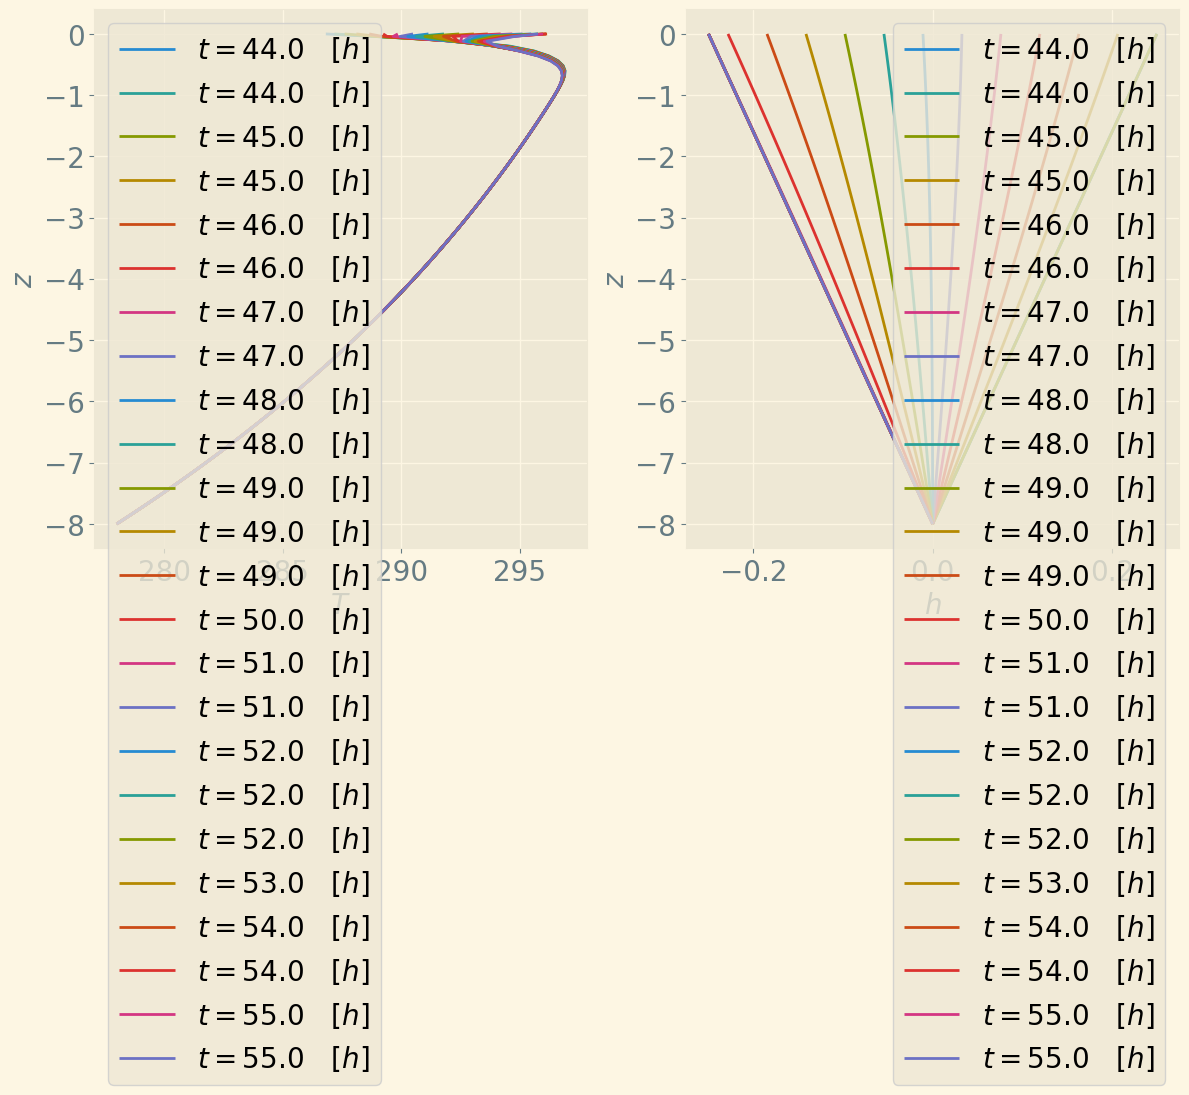

In [17]:
### Affichage solution dimensionnelle

temps, Z_aff_cor, H_aff_cor, T_aff_cor = redimensionnement(dtau, T_cor_temp, H_cor_temp, h_adm, h_nap, h_riv, T_riv, T_nap, P, T_riv_ad=T_riv_ad_t, H_riv_ad = H_riv_ad_t)
afficher_H_T_dim(temps, Z_aff_cor, H_aff_cor, T_aff_cor, times = 44 + np.arange(24)/2, N_dec = 0)

On remarque bien ce qui avait été annoncé au départ: l'ajustement de la charge est instantanné. Le profil est toujours le profil d'équilibre, i.e. une droite paramétrée par les valeurs aux limites. Il n'y a pas de régime transitoire visible.